**Cau 3:**

In [119]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [120]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [127]:
data = pd.read_csv('/content/drive/MyDrive/AI_THI/de2.csv')
data

,ID,Picture quality,Sound quality,Age,Class
0,1,poor,good,2,faulty
1,2,poor,excellent,1,faulty
2,3,good,poor,2,faulty
3,4,good,poor,2,faulty
4,5,good,excellent,1,not faulty
5,6,good,good,1,not faulty
6,7,good,good,2,faulty
7,8,excellent,good,1,faulty
8,9,excellent,excellent,1,not faulty
9,10,excellent,good,2,not faulty


In [128]:
X = data.iloc[:, 1:-1]  # các cột đầu tiên là các feature
X

,Picture quality,Sound quality,Age
0,poor,good,2
1,poor,excellent,1
2,good,poor,2
3,good,poor,2
4,good,excellent,1
5,good,good,1
6,good,good,2
7,excellent,good,1
8,excellent,excellent,1
9,excellent,good,2


In [129]:
y = data.iloc[:, -1]  # cột cuối là nhãn
y

0         faulty
1         faulty
2         faulty
3         faulty
4     not faulty
5     not faulty
6         faulty
7         faulty
8     not faulty
9     not faulty
10        faulty
11        faulty
12    not faulty
13    not faulty
14           ???
Name: Class, dtype: object

In [130]:
from sklearn.preprocessing import LabelEncoder 
labelencoder_X1 = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
X

,Picture quality,Sound quality,Age
0,2,1,1
1,2,0,0
2,1,2,1
3,1,2,1
4,1,0,0
5,1,1,0
6,1,1,1
7,0,1,0
8,0,0,0
9,0,1,1


In [131]:
X1 = X.iloc[:-1, :]
X1

,Picture quality,Sound quality,Age
0,2,1,1
1,2,0,0
2,1,2,1
3,1,2,1
4,1,0,0
5,1,1,0
6,1,1,1
7,0,1,0
8,0,0,0
9,0,1,1


In [132]:
y1 = y.iloc[:-1,]
y1

0         faulty
1         faulty
2         faulty
3         faulty
4     not faulty
5     not faulty
6         faulty
7         faulty
8     not faulty
9     not faulty
10        faulty
11        faulty
12    not faulty
13    not faulty
Name: Class, dtype: object

In [133]:
# Tạo cây quyết định với thuật toán ID3
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X1.values, y1)

DecisionTreeClassifier(criterion='entropy')

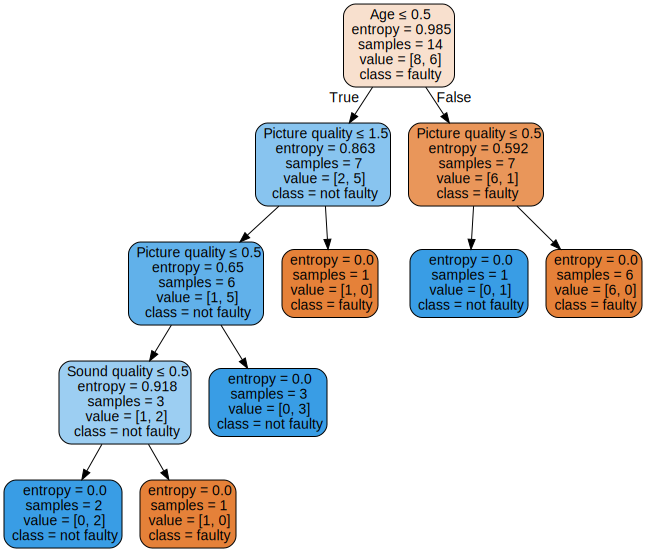

In [134]:
# Vẽ cây quyết định bằng graphviz
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,  
                           class_names=y.unique(),  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)
graph

**Dự đoán kết quả quyết định từ Class tại ID 15**

In [135]:
X_ID15 = X.iloc[-1, :] # Lấy dữ liệu của Class tại ID 15
X_ID15

Picture quality    0
Sound quality      1
Age                0
Name: 14, dtype: int64

In [136]:
y_ID15 = dt.predict([X_ID15]) # Dự đoán kết quả quyết định từ Class tại ID 15
y_ID15

array(['faulty'], dtype=object)